In [82]:
pip install numpy opencv-python scikit-learn


In [83]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


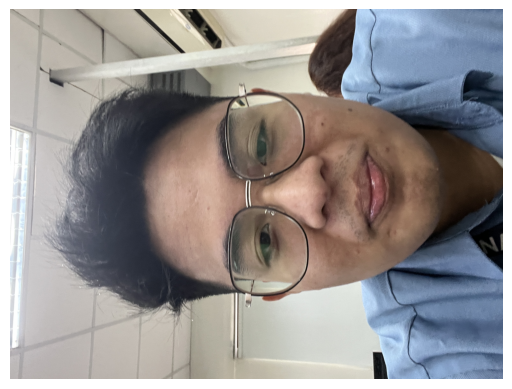

In [85]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/ML Dataset/Je/IMG_0627.JPG'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [86]:
print(os.listdir('/content/drive/My Drive/ML Dataset/Je/'))

['IMG_0659.JPG', 'IMG_0652.JPG', 'IMG_0655.JPG', 'IMG_0656.JPG', 'IMG_0657.JPG', 'IMG_0646.JPG', 'IMG_0658.JPG', 'IMG_0649.JPG', 'IMG_0641.JPG', 'IMG_0639.JPG', 'IMG_0648.JPG', 'IMG_0654.JPG', 'IMG_0644.JPG', 'IMG_0640.JPG', 'IMG_0651.JPG', 'IMG_0637.JPG', 'IMG_0638.JPG', 'IMG_0650.JPG', 'IMG_0629.JPG', 'IMG_0653.JPG', 'IMG_0630.JPG', 'IMG_0631.JPG', 'IMG_0647.JPG', 'IMG_0635.JPG', 'IMG_0634.JPG', 'IMG_0633.JPG', 'IMG_0642.JPG', 'IMG_0643.JPG', 'IMG_0628.JPG', 'IMG_0627.JPG']


In [87]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/ML Dataset/')

In [88]:
images.shape

(70, 10000)

In [89]:
labels.shape

(70,)

In [90]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)


In [92]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

In [93]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


Predicted label: [1]


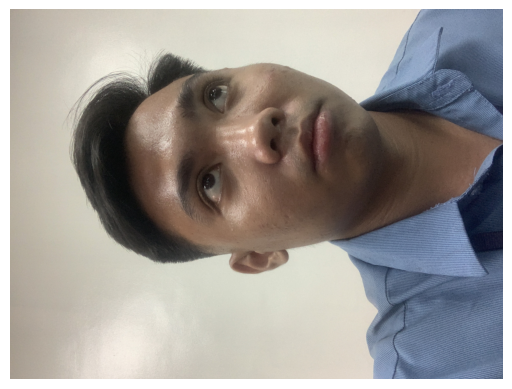

In [96]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/ML Testset/Copy of IMG_2142.JPG', model)
print(f'Predicted label:', result)

image_path = '/content/drive/My Drive/ML Testset/Copy of IMG_2142.JPG'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()